# Results analysis

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preliminary analysis

In [211]:
optimization = pd.read_csv('../results/optimization_results.csv')
optimization = optimization[['duration', 'energy_consumed', 'domain', 'model', 'framework', 'strategy']]
optimization

,duration,energy_consumed,domain,model,framework,strategy
0,1.124975,0.000018,NLP,gpt2,torch,pruning
1,0.746583,0.000011,NLP,gpt2,torch,pruning
2,0.874974,0.000014,NLP,gpt2,torch,pruning
3,1.031193,0.000016,NLP,gpt2,torch,pruning
4,0.703145,0.000011,NLP,gpt2,torch,pruning
...,...,...,...,...,...,...
715,93.109754,0.001486,CG,codegpt,tf,quantization
716,92.360154,0.001469,CG,codegpt,tf,quantization
717,95.125613,0.001507,CG,codegpt,tf,quantization
718,96.109462,0.001530,CG,codegpt,tf,quantization


In [212]:
optimization.describe()

,duration,energy_consumed
count,720.000000,720.000000
mean,16.846109,0.000268
std,32.213727,0.000512
min,0.109303,0.000002
25%,0.531257,0.000008
50%,0.984343,0.000015
75%,16.492163,0.000262
max,115.094641,0.001824


In [213]:
optimization.corr()

,duration,energy_consumed
duration,1.000000,0.999956
energy_consumed,0.999956,1.000000


In [214]:
inference = pd.read_csv('../results/inference_results.csv')
inference = inference[['duration', 'energy_consumed', 'domain', 'model', 'framework', 'version', 'correctness']]
inference = inference.replace('quantized.pth', 'quantized')
inference

,duration,energy_consumed,domain,model,framework,version,correctness
0,59.276125,0.000956,NLP,gpt2,torch,baseline,0.895445
1,59.687963,0.000954,NLP,gpt2,torch,baseline,0.898786
2,60.156222,0.000966,NLP,gpt2,torch,baseline,0.908001
3,61.515913,0.000986,NLP,gpt2,torch,baseline,0.892121
4,59.798992,0.000960,NLP,gpt2,torch,baseline,0.891528
...,...,...,...,...,...,...,...
1075,27.594316,0.000441,Code,codegpt,tf,quantized,0.527349
1076,25.453180,0.000405,Code,codegpt,tf,quantized,0.527349
1077,30.093821,0.000479,Code,codegpt,tf,quantized,0.526099
1078,27.078465,0.000431,Code,codegpt,tf,quantized,0.527349


In [215]:
inference.describe()

,duration,energy_consumed,correctness
count,1080.000000,1080.000000,1080.000000
mean,35.109013,0.000563,0.711619
std,26.135585,0.000418,0.226194
min,1.890588,0.000030,0.000000
25%,8.824165,0.000143,0.559479
50%,34.632315,0.000575,0.764330
75%,56.227463,0.000901,0.887190
max,149.268417,0.002388,0.913981


In [216]:
inference.corr()

,duration,energy_consumed,correctness
duration,1.000000,0.999852,0.016177
energy_consumed,0.999852,1.000000,0.017166
correctness,0.016177,0.017166,1.000000


## Optimization

We start with the optimization results. We first read the file and select the important columns.

In [217]:
optimization_numeric = optimization[['duration', 'energy_consumed']]
optimization_numeric.mean()

duration           16.846109
energy_consumed     0.000268
dtype: float64

In [218]:
optimization_numeric.sum()

duration           12129.198173
energy_consumed        0.192885
dtype: float64

In [225]:
group_big = optimization.groupby(['framework', 'strategy', 'model']).mean()
group_big

duration  energy_consumed
framework strategy     model                                 
tf        pruning      codegpt      1.330705         0.000021
                       codeparrot   1.076024         0.000017
                       gpt2         1.388012         0.000022
                       opt          1.039053         0.000016
                       regnet       0.413521         0.000006
                       resnet       0.446851         0.000007
          quantization codegpt     97.572360         0.001549
                       codeparrot  87.150836         0.001388
                       gpt2        94.655572         0.001506
                       opt         69.488731         0.001105
                       regnet      17.679698         0.000281
                       resnet      18.745308         0.000298
torch     pruning      codegpt      1.401566         0.000026
                       codeparrot   0.702587         0.000011
                       gpt2         0.812886         0.000013
                       opt          0.818736         0.000013
                       regnet       0.131714         0.000002
                       resnet       0.279122         0.000004
          quantization codegpt      2.298446         0.000036
                       codeparrot   1.341653         0.000021
                       gpt2         2.505200         0.000040
                       opt          2.641139         0.000042
                       regnet       0.156200         0.000002
                       resnet       0.230683         0.000003

### RQ1.1

In [221]:
group_strat = optimization.groupby(['framework', 'strategy']).mean()
group_strat

duration  energy_consumed
framework strategy                                
tf        pruning        0.949028         0.000015
          quantization  64.215418         0.001021
torch     pruning        0.691102         0.000011
          quantization   1.528887         0.000024

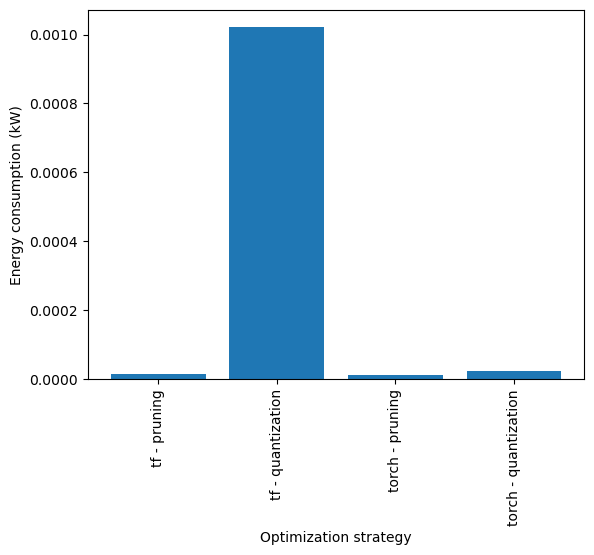

In [222]:
plot_df = group_strat.reset_index()
plt.bar(np.arange(len(plot_df)), plot_df['energy_consumed'])

plt.xticks(np.arange(len(plot_df)), plot_df['framework'] + ' - ' + plot_df['strategy'], rotation='vertical')

plt.xlabel('Optimization strategy')
plt.ylabel('Energy consumption (kW)')

plt.show()

### RQ1.2

In [223]:
group_model = optimization.groupby(['domain', 'model']).mean()
group_model

duration  energy_consumed
domain model                                 
CG     codegpt     25.650769         0.000408
       codeparrot  22.567775         0.000359
CV     regnet       4.595283         0.000073
       resnet       4.925491         0.000078
NLP    gpt2        24.840418         0.000395
       opt         18.496915         0.000294

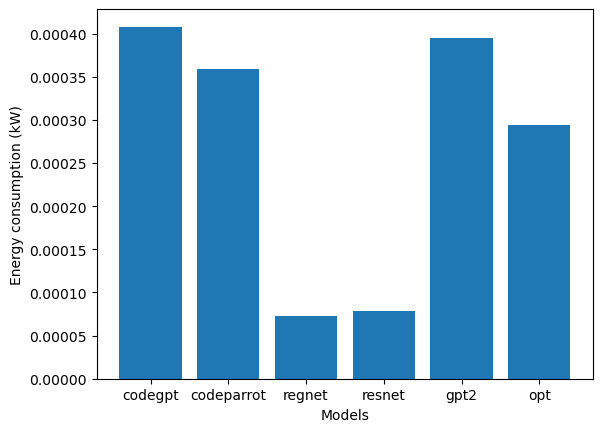

In [224]:
plot_df = group_model.reset_index()
plt.bar(plot_df['model'], plot_df['energy_consumed'])

plt.xlabel('Models')
plt.ylabel('Energy consumption (kW)')

plt.show()

## Inference

In [226]:
inference_numeric = inference[['duration', 'energy_consumed', 'correctness']]
inference_numeric.mean()

duration           35.109013
energy_consumed     0.000563
correctness         0.711619
dtype: float64

In [227]:
inference_numeric.sum()

duration           37917.733615
energy_consumed        0.608225
correctness          768.548389
dtype: float64

In [234]:
group_big = inference.groupby(['framework', 'version', 'model']).mean()
group_big

duration  energy_consumed  correctness
framework version   model                                              
tf        baseline  codegpt     39.432828         0.000631     0.494224
                    codeparrot  46.448299         0.000744     0.464771
                    gpt2        30.863741         0.000499     0.734385
                    opt         31.415871         0.000507     0.724286
                    regnet       8.744744         0.000141     0.860000
                    resnet       9.913550         0.000160     0.900000
          pruned    codegpt     39.435308         0.000630     0.494547
                    codeparrot  64.089729         0.001026     0.464784
                    gpt2        30.679239         0.000500     0.734821
                    opt         31.424299         0.000503     0.724205
                    regnet       8.962454         0.000144     0.860000
                    resnet       9.849412         0.000159     0.900000
          quantized codegpt     27.972672         0.000447     0.526867
                    codeparrot  72.494331         0.001159     0.701000
                    gpt2        56.884698         0.000913     0.897654
                    opt         21.068433         0.000337     0.826403
                    regnet       1.931486         0.000031     0.860000
                    resnet       2.766083         0.000044     0.900000
torch     baseline  codegpt     57.256663         0.000919     0.552541
                    codeparrot  59.032161         0.000946     0.697520
                    gpt2        59.246016         0.000953     0.896759
                    opt         48.756716         0.000782     0.886735
                    regnet       2.042648         0.000033     0.860000
                    resnet       4.283779         0.000069     0.900000
          pruned    codegpt     57.367741         0.000919     0.552572
                    codeparrot  57.809483         0.000925     0.694588
                    gpt2        60.276941         0.000970     0.898200
                    opt         48.239032         0.000774     0.886977
                    regnet       2.034318         0.000033     0.003333
                    resnet       4.096799         0.000066     0.000000
          quantized codegpt     52.110888         0.000834     0.565526
                    codeparrot  56.742161         0.000907     0.697426
                    gpt2        55.194924         0.000888     0.811521
                    opt         99.185772         0.001587     0.886633
                    regnet       1.950473         0.000032     0.860000
                    resnet       3.920761         0.000063     0.900000

### RQ2.1

In [231]:
group_version = inference.groupby(['framework', 'version']).mean()
group_version

duration  energy_consumed  correctness
framework version                                           
tf        baseline   27.803172         0.000447     0.696278
          pruned     30.740074         0.000494     0.696393
          quantized  30.519617         0.000488     0.785321
torch     baseline   38.436331         0.000617     0.798926
          pruned     38.304052         0.000614     0.505945
          quantized  44.850830         0.000719     0.786851

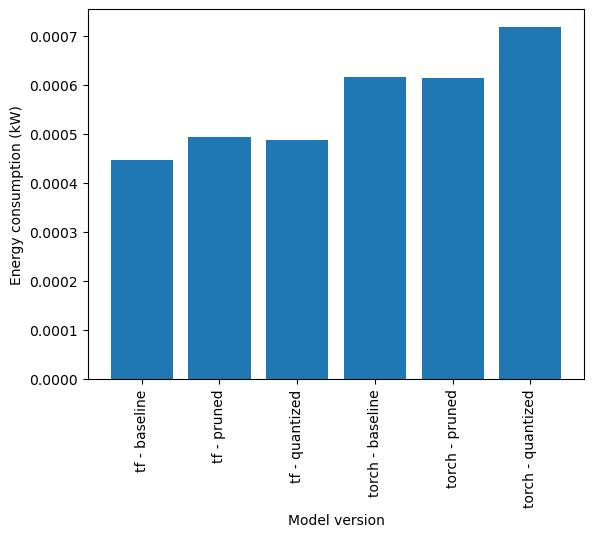

"\ncolumns_to_plot = ['emissions', 'cpu_energy', 'gpu_energy', 'ram_energy']\n\nnum_columns = len(columns_to_plot)\nbar_width = 0.8 / num_columns\n\nfor i, column in enumerate(columns_to_plot):\n    offset = i - (num_columns - 1) / 2.0\n    x = np.arange(len(plot_df)) + offset * bar_width\n    plt.bar(x, plot_df[column], width=bar_width, alpha=0.5, label=column)\n\nplt.xticks(np.arange(len(plot_df)), plot_df['framework'] + ' - ' + plot_df['version'], rotation='vertical')\n\nplt.xlabel('Model version')\nplt.ylabel('(kg & kW)')\n\n# Add the legend\nplt.legend(loc='upper right')\n\nplt.show()\n"

In [232]:
plot_df = group_version.reset_index()
plt.bar(np.arange(len(plot_df)), plot_df['energy_consumed'])

plt.xticks(np.arange(len(plot_df)), plot_df['framework'] + ' - ' + plot_df['version'], rotation='vertical')

plt.xlabel('Model version')
plt.ylabel('Energy consumption (kW)')

plt.show()
"""
columns_to_plot = ['emissions', 'cpu_energy', 'gpu_energy', 'ram_energy']

num_columns = len(columns_to_plot)
bar_width = 0.8 / num_columns

for i, column in enumerate(columns_to_plot):
    offset = i - (num_columns - 1) / 2.0
    x = np.arange(len(plot_df)) + offset * bar_width
    plt.bar(x, plot_df[column], width=bar_width, alpha=0.5, label=column)

plt.xticks(np.arange(len(plot_df)), plot_df['framework'] + ' - ' + plot_df['version'], rotation='vertical')

plt.xlabel('Model version')
plt.ylabel('(kg & kW)')

# Add the legend
plt.legend(loc='upper right')

plt.show()
"""

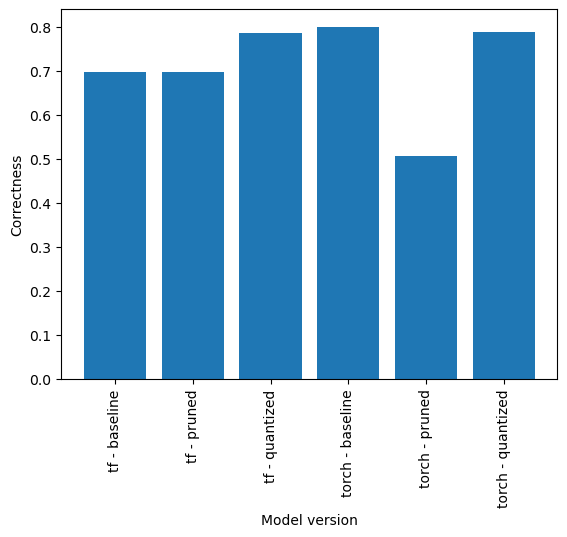

In [233]:
plt.bar(np.arange(len(plot_df)), plot_df['correctness'])

plt.xticks(np.arange(len(plot_df)), plot_df['framework'] + ' - ' + plot_df['version'], rotation='vertical')

plt.xlabel('Model version')
plt.ylabel('Correctness')

plt.show()

### RQ2.2

In [228]:
group_model = inference.groupby(['domain', 'model']).mean()
group_model

duration  energy_consumed  correctness
domain          model                                              
Code            codegpt     45.596017         0.000730     0.531046
                codeparrot  59.436027         0.000951     0.620015
Computer Vision regnet       4.277687         0.000069     0.717222
                resnet       5.805064         0.000094     0.750000
NLP             gpt2        48.857593         0.000787     0.828890
                opt         46.681687         0.000748     0.822540

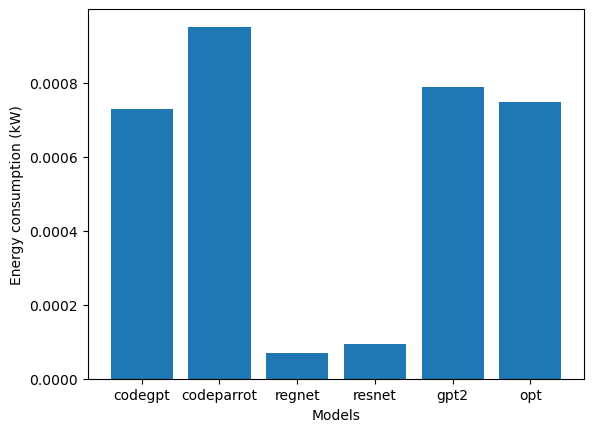

In [229]:
plot_df = group_model.reset_index()
plt.bar(plot_df['model'], plot_df['energy_consumed'])

plt.xlabel('Models')
plt.ylabel('Energy consumption (kW)')

plt.show()

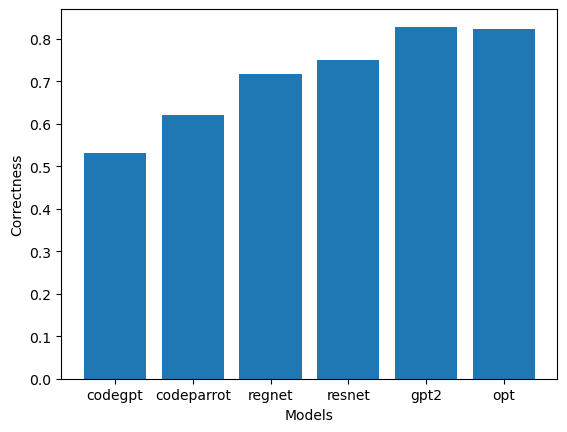

In [230]:
plt.bar(plot_df['model'], plot_df['correctness'])
plt.xlabel('Models')
plt.ylabel('Correctness')
plt.show()